## Phi's Fish Factory 

Phi's Fish Factory has collected two weeks of sales data related to it's Lobsters line. 
The manager wants to know what factors drive the sales of Lobsters. 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
location = '../PhilsFishFactoryData.xlsx'
df = pd.read_excel(location)
df.head() 

,Unnamed: 0,Day,Wholesale Price ($/lb),# Lobsters sold
0,NaN,Fri,7.0,4
1,NaN,sat,4.0,29
2,NaN,Sun,6.5,18
3,NaN,Mon,5.0,17
4,NaN,Tue,4.0,25


In [3]:
del df['Unnamed: 0']

In [4]:
def day_to_numeric(x):
    if x == 'Mon':
        return 1
    if x == 'Tue':
        return 2  
    if x == 'Wed':
        return 3   
    if x == 'Thur':
        return 4  
    if x == 'Fri':
        return 5  
    if x in [ 'Sat', 'sat']:
        return 6  
    if x == 'Sun':
        return 7  
    
df['d_o_week'] = df['Day'].apply(day_to_numeric)

df['days_code'] = df['d_o_week']

df = pd.get_dummies(df, columns=['d_o_week'], prefix='day')
df 


,Day,Wholesale Price ($/lb),# Lobsters sold,days_code,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,Fri,7.0,4,5,0,0,0,0,1,0,0
1,sat,4.0,29,6,0,0,0,0,0,1,0
2,Sun,6.5,18,7,0,0,0,0,0,0,1
3,Mon,5.0,17,1,1,0,0,0,0,0,0
4,Tue,4.0,25,2,0,1,0,0,0,0,0
5,Wed,3.5,28,3,0,0,1,0,0,0,0
6,Thur,4.5,16,4,0,0,0,1,0,0,0
7,Fri,7.0,4,5,0,0,0,0,1,0,0
8,Sat,6.0,13,6,0,0,0,0,0,1,0
9,Sun,5.5,23,7,0,0,0,0,0,0,1


In [5]:
df.rename(index=str, columns={"Mon": "day_1","Tue": "day_2","Wed": "day_3",
                              "Thu": "day_4","Fri": "day_5","Sat": "day_6","Sun": "day_7" })

df['Mon'] = df['day_1']
df['Tue'] = df['day_2']
df['Wed'] = df['day_3']
df['Thu'] = df['day_4']
df['Fri'] = df['day_5']
df['Sat'] = df['day_6']
df['Sun'] = df['day_7']


In [6]:
dropnames = [col for col in list(df.columns.values) if col.startswith('day_')]

In [7]:
df.drop(dropnames, axis=1, inplace=True)
df 

,Day,Wholesale Price ($/lb),# Lobsters sold,days_code,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,Fri,7.0,4,5,0,0,0,0,1,0,0
1,sat,4.0,29,6,0,0,0,0,0,1,0
2,Sun,6.5,18,7,0,0,0,0,0,0,1
3,Mon,5.0,17,1,1,0,0,0,0,0,0
4,Tue,4.0,25,2,0,1,0,0,0,0,0
5,Wed,3.5,28,3,0,0,1,0,0,0,0
6,Thur,4.5,16,4,0,0,0,1,0,0,0
7,Fri,7.0,4,5,0,0,0,0,1,0,0
8,Sat,6.0,13,6,0,0,0,0,0,1,0
9,Sun,5.5,23,7,0,0,0,0,0,0,1


In [8]:
df['price'] = df['Wholesale Price ($/lb)']
df['lobsters'] = df['# Lobsters sold']
df['dollar_sales'] = df['Wholesale Price ($/lb)'] * df['# Lobsters sold']
df 

,Day,Wholesale Price ($/lb),# Lobsters sold,days_code,Mon,Tue,Wed,Thu,Fri,Sat,Sun,price,lobsters,dollar_sales
0,Fri,7.0,4,5,0,0,0,0,1,0,0,7.0,4,28.0
1,sat,4.0,29,6,0,0,0,0,0,1,0,4.0,29,116.0
2,Sun,6.5,18,7,0,0,0,0,0,0,1,6.5,18,117.0
3,Mon,5.0,17,1,1,0,0,0,0,0,0,5.0,17,85.0
4,Tue,4.0,25,2,0,1,0,0,0,0,0,4.0,25,100.0
5,Wed,3.5,28,3,0,0,1,0,0,0,0,3.5,28,98.0
6,Thur,4.5,16,4,0,0,0,1,0,0,0,4.5,16,72.0
7,Fri,7.0,4,5,0,0,0,0,1,0,0,7.0,4,28.0
8,Sat,6.0,13,6,0,0,0,0,0,1,0,6.0,13,78.0
9,Sun,5.5,23,7,0,0,0,0,0,0,1,5.5,23,126.5


In [9]:
df.corr()

,Wholesale Price ($/lb),# Lobsters sold,days_code,Mon,Tue,Wed,Thu,Fri,Sat,Sun,price,lobsters,dollar_sales
Wholesale Price ($/lb),1.000000,-0.627493,0.335825,0.152333,-0.345289,-0.629644,0.152333,0.507778,-0.060933,0.223422,1.000000,-0.627493,-0.296218
# Lobsters sold,-0.627493,1.000000,-0.019919,-0.175645,0.484651,0.097581,-0.243952,-0.562715,0.211425,0.188656,-0.627493,1.000000,0.896884
days_code,0.335825,-0.019919,1.000000,-0.612372,-0.408248,-0.204124,0.000000,0.204124,0.408248,0.612372,0.335825,-0.019919,0.211494
Mon,0.152333,-0.175645,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.152333,-0.175645,-0.099846
Tue,-0.345289,0.484651,-0.408248,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.345289,0.484651,0.352734
Wed,-0.629644,0.097581,-0.204124,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.629644,0.097581,-0.194372
Thu,0.152333,-0.243952,0.000000,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,0.152333,-0.243952,-0.231609
Fri,0.507778,-0.562715,0.204124,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,0.507778,-0.562715,-0.563883
Sat,-0.060933,0.211425,0.408248,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.060933,0.211425,0.226699
Sun,0.223422,0.188656,0.612372,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,0.223422,0.188656,0.510277


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

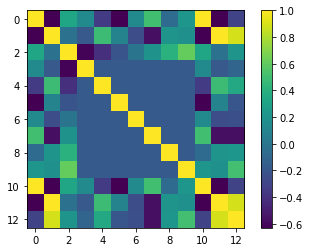

In [11]:
plt.imshow(df.corr())
plt.colorbar()
plt.show() 

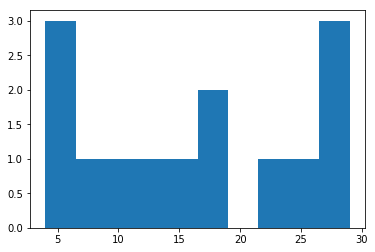

In [12]:
plt.hist(df['lobsters'])
plt.show() 

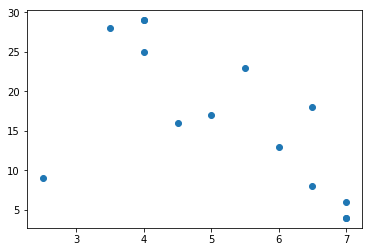

In [13]:
plt.scatter(df['price'], df['lobsters'])
plt.show() 

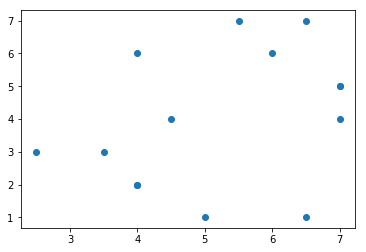

In [14]:
plt.scatter(df['price'], df['days_code'])
plt.show()

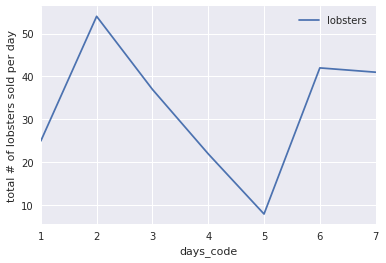

In [16]:
sns.set()  # Use seaborn style 
df.pivot_table('lobsters', index='days_code',  aggfunc='sum').plot()
plt.ylabel('total # of lobsters sold per day')
plt.show()

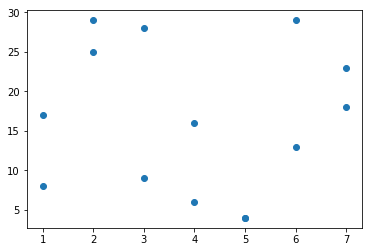

In [15]:
plt.scatter(df['days_code'], df['lobsters'])
plt.show() 

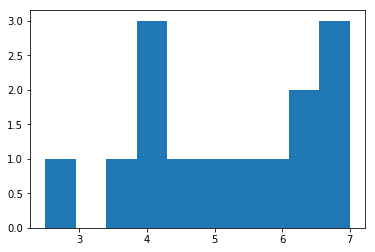

In [16]:
plt.hist(df['price'])
plt.show() 

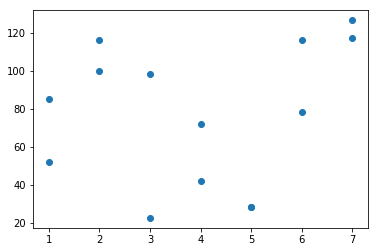

In [17]:
plt.scatter(df['days_code'], df['dollar_sales'])
plt.show() 

In [18]:
import statsmodels.formula.api as sm
result = sm.ols(formula='lobsters ~ price + Mon + Tue + Wed + Thu + Fri + Sat + Sun', data=df).fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:               lobsters   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     2.260
Date:                Wed, 03 Oct 2018   Prob (F-statistic):              0.170
Time:                        10:25:05   Log-Likelihood:                -41.535
No. Observations:                  14   AIC:                             99.07
Df Residuals:                       6   BIC:                             104.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.0905     12.284      2.612      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [19]:
import statsmodels.formula.api as sm
result = sm.ols(formula='lobsters ~ price + Mon + Tue + Wed + Thu + Fri + Sat + Sun - 1', data=df).fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:               lobsters   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     2.260
Date:                Wed, 03 Oct 2018   Prob (F-statistic):              0.170
Time:                        10:25:07   Log-Likelihood:                -41.535
No. Observations:                  14   AIC:                             99.07
Df Residuals:                       6   BIC:                             104.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price         -3.8966      2.667     -1.461      0.1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


Price has negative relation with the quantity of Lobsters sold.
Friday is not as important as other days of the week

In [20]:
import statsmodels.formula.api as sm
result = sm.ols(formula='lobsters ~ price + Mon + Tue + Wed + Thu + Sat + Sun - 1', data=df).fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:               lobsters   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 03 Oct 2018   Prob (F-statistic):            0.00355
Time:                        10:25:08   Log-Likelihood:                -44.065
No. Observations:                  14   AIC:                             102.1
Df Residuals:                       7   BIC:                             106.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.2637      0.776      0.340      0.7

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [21]:
import statsmodels.formula.api as sm
result = sm.ols(formula='lobsters ~ price + Mon + Tue + Wed + Sat + Sun - 1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lobsters   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     10.38
Date:                Wed, 03 Oct 2018   Prob (F-statistic):            0.00208
Time:                        10:25:09   Log-Likelihood:                -45.620
No. Observations:                  14   AIC:                             103.2
Df Residuals:                       8   BIC:                             107.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.9001      0.636      1.415      0.1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [22]:
import statsmodels.formula.api as sm
result = sm.ols(formula='lobsters ~ price + Tue + Wed + Sat + Sun - 1', data=df).fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:               lobsters   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     12.07
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           0.000893
Time:                        10:25:10   Log-Likelihood:                -46.535
No. Observations:                  14   AIC:                             103.1
Df Residuals:                       9   BIC:                             106.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.2547      0.544      2.307      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


After we removed Mon, Thu and Fri, the whole sale price of Lobsters has positive relation with the sale volume of the Lobsters.
Tue, Wed, Sat and Sun are important to the Lobsters sales. 